In [1]:
import pandas as pd

train = pd.read_csv("../input/spaceship-titanic/train.csv")
test = pd.read_csv("../input/spaceship-titanic/test.csv")
submission = pd.read_csv("../input/spaceship-titanic/sample_submission.csv")

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [2]:
print(f'Number of rows in train data: {train.shape[0]}')
print(f'Number of columns in train data: {train.shape[1]}')
print(f'Number of values in train data: {train.count().sum()}')
print(f'Number missing values in train data: {sum(train.isna().sum())}')
print("\n")
print(f'Number of rows in test data: {test.shape[0]}')
print(f'Number of columns in test data: {test.shape[1]}')
print(f'Number of values in test data: {test.count().sum()}')
print(f'Number missing values in test data: {sum(test.isna().sum())}')

Number of rows in train data: 8693
Number of columns in train data: 14
Number of values in train data: 119378
Number missing values in train data: 2324


Number of rows in test data: 4277
Number of columns in test data: 13
Number of values in test data: 54484
Number missing values in test data: 1117


In [3]:
# 컬럼당 null 갯수

train.isna().sum().sort_values(ascending = False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
Transported       0
PassengerId       0
dtype: int64

In [4]:
test.isna().sum().sort_values(ascending = False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
VIP              93
CryoSleep        93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

In [5]:
train.describe()

# Age를 제외한 다른 데이터는 과반이 0이지만 소수가 매우 큰 값을 가지고 있음
# -> 5개 컬럼이 비슷한 분포, 다중공선성을 가지고 있을 수 있음

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
test.describe()

# train과 비슷함

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [7]:
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [8]:
train["Transported"].value_counts()

# novelty class는 반반

True     4378
False    4315
Name: Transported, dtype: int64

In [9]:
# 앞 4자리 : 그룹번호
# 뒤 2자리 : 그룹 내 구성원 번호

print(len(train)+len(test))
print(train["PassengerId"].tail())

# 전체 데이터 갯수 : 12870, 전체 그룹 갯수 : 9280
# 한 그룹에 평균적으로 1.38명이 포함됨
# 그룹을 가지고 생존 여부를 판단하기는 힘들것같음 ex) sibling#

12970
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, dtype: object


In [10]:
# 필요가 없을것으로 판단된 PassengerId와 의미없는 Name을 드랍

train.drop(["PassengerId", "Name"], axis=1, inplace=True)
test.drop(["PassengerId", "Name"], axis=1, inplace=True)
TARGET = 'Transported'
FEATURES = [col for col in train.columns if col not in ['id', TARGET]]  # id와 target이 아닌 column들을 feature로 분류
RANDOM_STATE = 12

train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [11]:
missing_train_row = train.isna().sum(axis=1)

print(missing_train_row.value_counts())

# 한 컬럼에 결측값이 3개인 경우는 12개에 불과하므로 제거해도 될것같음

0    6764
1    1746
2     171
3      12
dtype: int64


In [12]:
print(train["HomePlanet"].nunique())
print(train["Cabin"].nunique())
print(train["Destination"].nunique())

# HomePlanet, Destination은 unique value가 3개뿐이므로 원핫 인코딩
# Cabin은 6560개라서 데이터를 잘게 쪼개서 분석해야할듯

3
6560
3


8693
6764


<ipython-input-13-306199631d0a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dummies["CryoSleep"] = train_dummies["CryoSleep"].astype(int)
<ipython-input-13-306199631d0a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dummies["VIP"] = train_dummies["VIP"].astype(int)
<ipython-input-13-306199631d0a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

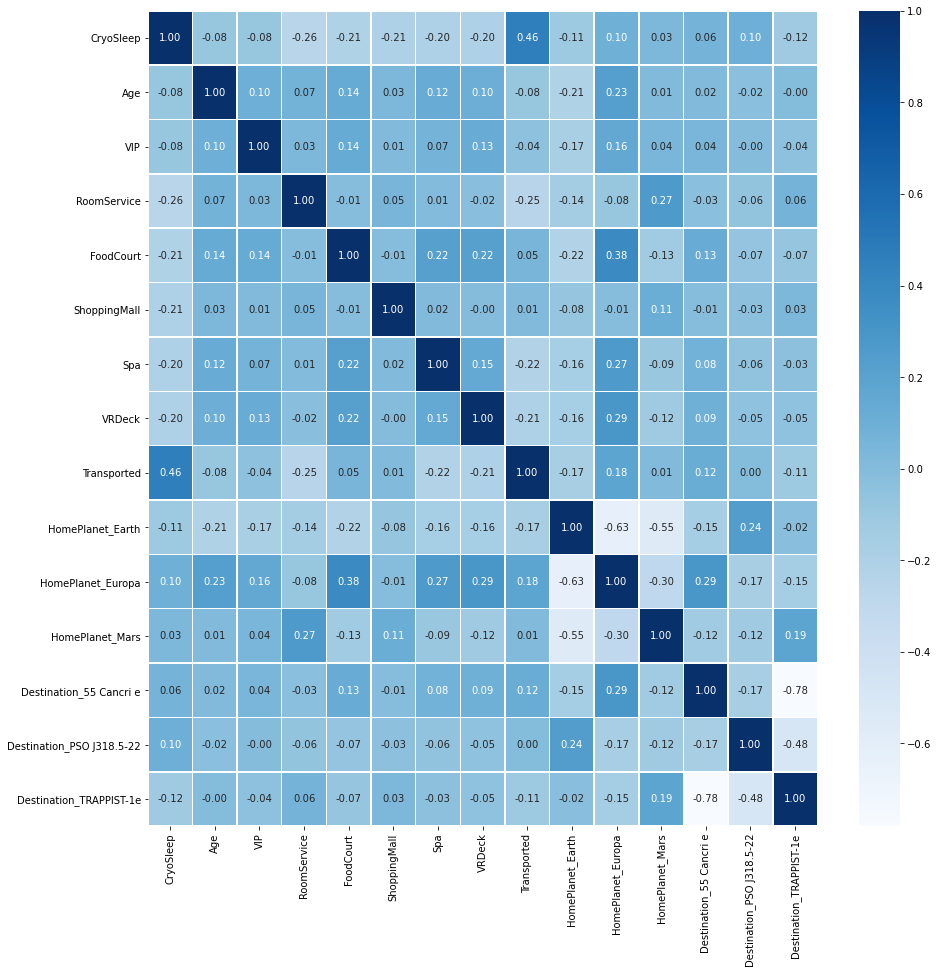

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 우선 nan값을 모두 드랍하고 상관계수 확인
print(len(train))
train_dummies = train.dropna()
print(len(train_dummies))

# True/ False -> 1/0
train_dummies["CryoSleep"] = train_dummies["CryoSleep"].astype(int)
train_dummies["VIP"] = train_dummies["VIP"].astype(int)
train_dummies["Transported"] = train_dummies["Transported"].astype(int)

# one-hot encoding categorical column
train_dummies = pd.get_dummies(train_dummies, columns=["HomePlanet", "Destination"])

plt.figure(figsize=(15,15))
sns.heatmap(data = train_dummies.corr(), annot=True,  fmt = '.2f', linewidths=.5, cmap='Blues')

# 0 ~ 0.3 : 약한 상관관계
# 0.3 ~ 0.7 : 중간 상관관계
# 0.7 ~ 1 : 강한 상관관계

# CryoSleep 여부가 Transported에 유의한 상관관계가 있음

In [14]:
# Cabin column eda

#train_dummies = train.dropna()
#print(train_dummies.columns)

# 맨 앞 단어 하나, 맨 뒤 단어 하나, 나머지 숫자로 구분
train_dummies["Cabin_1"] = train_dummies["Cabin"].str.slice(0,1,1)
train_dummies["Cabin_2"] = train_dummies["Cabin"].str.slice(start=2, stop=-2)
train_dummies["Cabin_3"] = train_dummies["Cabin"].str.slice(-1,)

print(train_dummies["Cabin"])
# deck/num/side의 형태로 구분됨

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 6764, dtype: object


In [15]:
# 분리한 컬럼 고유값

print(train_dummies["Cabin_1"].nunique())
print(train_dummies["Cabin_2"].nunique())
print(train_dummies["Cabin_3"].nunique())

print(train_dummies["Cabin_1"].unique())
print(train_dummies["Cabin_2"].unique())
print(train_dummies["Cabin_3"].unique())

8
1744
2
['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
['0' '1' '2' ... '1894' '1499' '608']
['P' 'S']


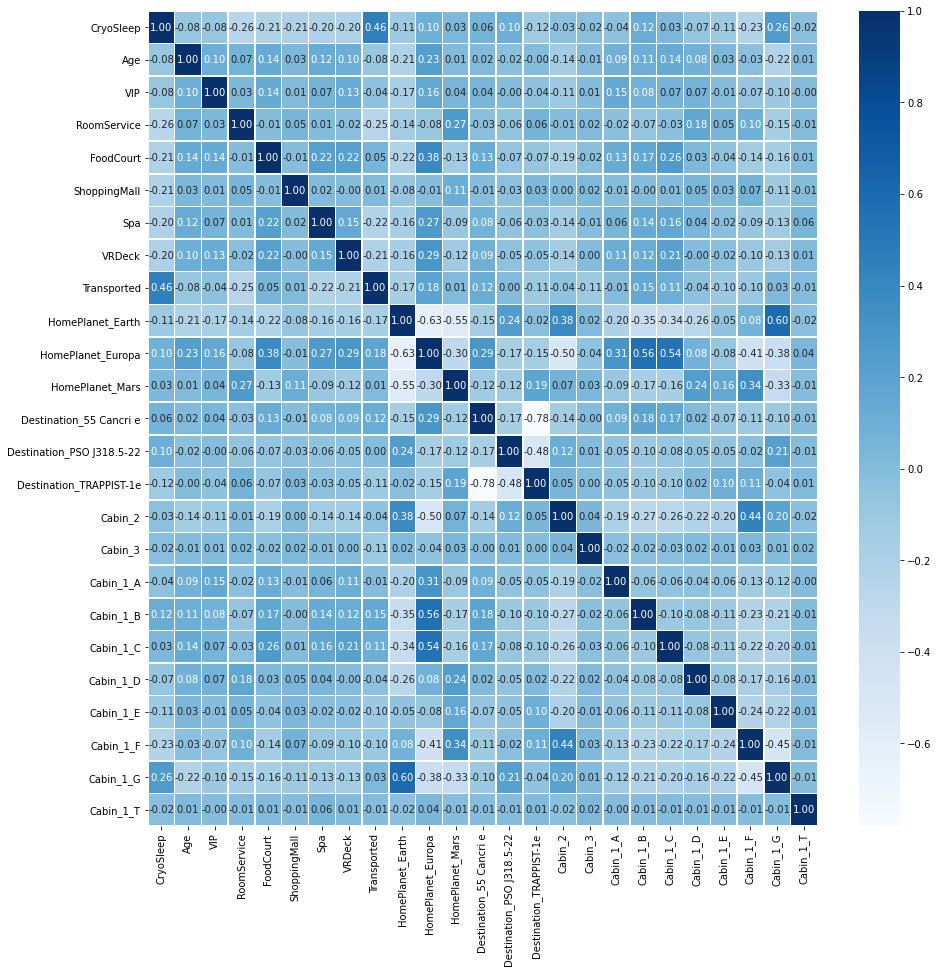

In [16]:
# Cabin column encoding

train_dummies = pd.get_dummies(train_dummies, columns=["Cabin_1"])
train_dummies["Cabin_2"] = train_dummies["Cabin_2"].astype(int)
train_dummies["Cabin_3"] = train_dummies["Cabin_3"].map({"P":1, "S":0})

plt.figure(figsize=(15,15))
sns.heatmap(data = train_dummies.corr(), annot=True,  fmt = '.2f', linewidths=.5, cmap='Blues')

# 목적변수와 유의미한 상관관계는 알 수 없음
# 홈플래닛이 지구인 경우와 유로파인 경우의 상관계수가 크게 다름
# 두 변수가 어느정도 반대되는 특성을 가졌다는것을 알 수 있음

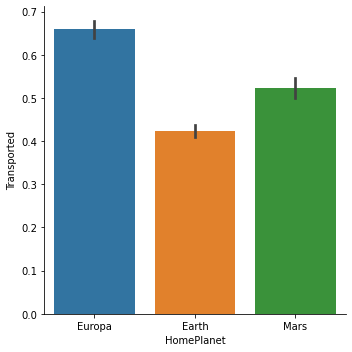

In [17]:
sns.catplot(x="HomePlanet", y="Transported", kind="bar", data=train)

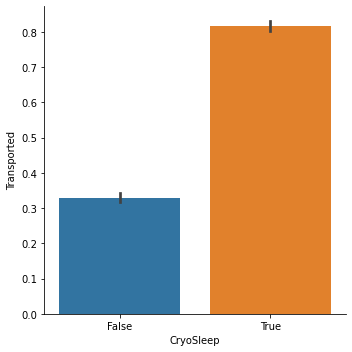

In [18]:
sns.catplot(x="CryoSleep", y="Transported", kind="bar", data=train)

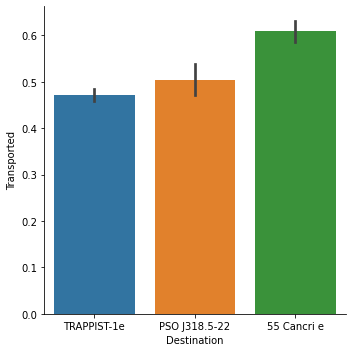

In [19]:
sns.catplot(x="Destination", y="Transported", kind="bar", data=train)